<a href="https://colab.research.google.com/github/HUJameson/Colab/blob/main/aillm_0104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fasttext
!pip install transformers
!pip install sentencepiece

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import fasttext
import fasttext.util
#import gensim

# Load the FastText pre-trained model
#model = gensim.models.fasttext.load_facebook_model('./model/cc.en.300.bin')
fasttext.util.download_model('en', if_exists='ignore')  # English
model = fasttext.load_model('cc.en.300.bin')

In [ ]:
import numpy as np
from openai.embeddings_utils import cosine_similarity


def get_fasttext_vector(line):
    vec = np.zeros(300) # Initialize an empty 300-dimensional vector
    for word in line.split():
        #vec += model.wv[word]
        vec += model.get_word_vector(word)
    vec /= len(line.split()) # Take the average over all words in the line
    return vec

positive_text = """Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone"""
negative_text = """First, these should be called Mac - Coconut bars, as Coconut is the #2 ingredient and Mango is #3.  Second, lots of people don't like coconut.  I happen to be allergic to it.  Word to Amazon that if you want happy customers to make things like this more prominent.  Thanks."""

positive_example_in_fasttext = get_fasttext_vector(positive_text)
negative_example_in_fasttext = get_fasttext_vector(negative_text)

positive_review_in_fasttext = get_fasttext_vector("An Amazon review with a positive sentiment.")
negative_review_in_fasttext = get_fasttext_vector('An Amazon review with a negative sentiment.')

def get_fasttext_score(sample_embedding):
    return cosine_similarity(sample_embedding, positive_review_in_fasttext) - cosine_similarity(sample_embedding, negative_review_in_fasttext)

positive_score = get_fasttext_score(positive_example_in_fasttext)
negative_score = get_fasttext_score(negative_example_in_fasttext)

print("Fasttext好评例子的评分 : %f" % (positive_score))
print("Fasttext差评例子的评分 : %f" % (negative_score))

Fasttext好评例子的评分 : -0.000544
Fasttext差评例子的评分 : 0.000369


In [1]:
from transformers import T5Tokenizer, T5Model
import torch
from openai.embeddings_utils import cosine_similarity

# load the T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small', model_max_length=512)
model = T5Model.from_pretrained('t5-small')

# set the model to evaluation mode
model.eval()

# encode the input sentence
def get_t5_vector(line):
  input_ids = tokenizer.encode(line, return_tensors='pt', max_length=512, truncation=True)
  # generate the vector representation
  with torch.no_grad():
    outputs = model.encoder(input_ids=input_ids)
    vector = outputs.last_hidden_state.mean(dim=1)
  return vector[0]

positive_text = """Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone"""
negative_text = """First, these should be called Mac - Coconut bars, as Coconut is the #2 ingredient and Mango is #3.  Second, lots of people don't like coconut.  I happen to be allergic to it.  Word to Amazon that if you want happy customers to make things like this more prominent.  Thanks."""
positive_review_in_t5 = get_t5_vector("An Amazon review with a positive sentiment.")
negative_review_in_t5 = get_t5_vector('An Amazon review with a negative sentiment.')

def test_t5():
  positive_example_in_t5 = get_t5_vector(positive_text)
  negative_example_in_t5 = get_t5_vector(negative_text)

  def get_t5_score(sample_embedding):
    return cosine_similarity(sample_embedding, positive_review_in_t5) - cosine_similarity(sample_embedding, negative_review_in_t5)

  positive_score = get_t5_score(positive_example_in_t5)
  negative_score = get_t5_score(negative_example_in_t5)

  print("T5好评例子的评分 : %f" % (positive_score))
  print("T5差评例子的评分 : %f" % (negative_score))

test_t5()

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


T5好评例子的评分 : -0.010294
T5差评例子的评分 : -0.008990


In [ ]:
from transformers import T5Tokenizer, T5Model
import torch
from openai.embeddings_utils import cosine_similarity

# load the T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-base', model_max_length=512)
model = T5Model.from_pretrained('t5-base')

# set the model to evaluation mode
model.eval()

# encode the input sentence
def get_t5_vector(line):
  input_ids = tokenizer.encode(line, return_tensors='pt', max_length=512, truncation=True)
  # generate the vector representation
  with torch.no_grad():
    outputs = model.encoder(input_ids=input_ids)
    vector = outputs.last_hidden_state.mean(dim=1)
  return vector[0]

positive_text = """Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone"""
negative_text = """First, these should be called Mac - Coconut bars, as Coconut is the #2 ingredient and Mango is #3.  Second, lots of people don't like coconut.  I happen to be allergic to it.  Word to Amazon that if you want happy customers to make things like this more prominent.  Thanks."""
positive_review_in_t5 = get_t5_vector("An Amazon review with a positive sentiment.")
negative_review_in_t5 = get_t5_vector('An Amazon review with a negative sentiment.')

def test_t5():
  positive_example_in_t5 = get_t5_vector(positive_text)
  negative_example_in_t5 = get_t5_vector(negative_text)

  def get_t5_score(sample_embedding):
    return cosine_similarity(sample_embedding, positive_review_in_t5) - cosine_similarity(sample_embedding, negative_review_in_t5)

  positive_score = get_t5_score(positive_example_in_t5)
  negative_score = get_t5_score(negative_example_in_t5)

  print("T5好评例子的评分 : %f" % (positive_score))
  print("T5差评例子的评分 : %f" % (negative_score))

test_t5()

T5好评例子的评分 : 0.010347
T5差评例子的评分 : -0.023935


<ipython-input-9-e1124b61dd82>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})


              precision    recall  f1-score   support

    negative       0.60      0.90      0.72       136
    positive       0.98      0.90      0.94       789

    accuracy                           0.90       925
   macro avg       0.79      0.90      0.83       925
weighted avg       0.93      0.90      0.91       925



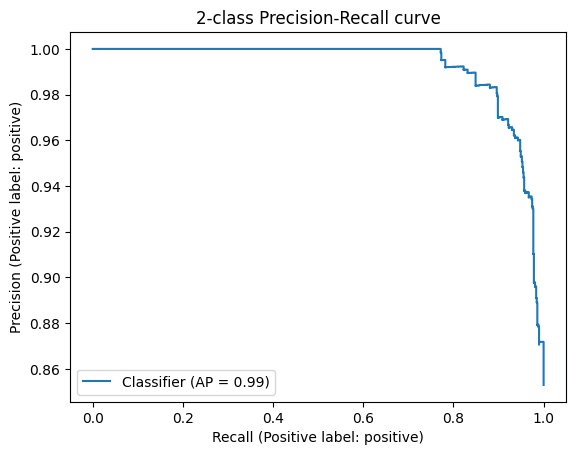

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)

df["t5_embedding"] = df.Text.apply(get_t5_vector)
# convert 5-star rating to binary sentiment
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

from sklearn.metrics import PrecisionRecallDisplay
def evaluate_embeddings_approach():
  def label_score(review_embedding):
    return cosine_similarity(review_embedding, positive_review_in_t5) - cosine_similarity(review_embedding, negative_review_in_t5)

  probas = df["t5_embedding"].apply(lambda x: label_score(x))
  preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

  report = classification_report(df.sentiment, preds)
  print(report)

  display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
  _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach()